##Homework 3

In this homework you will perform exploratory data analysis and hypothesis testing on the Iris Dataset.

1. First you will need import the libraries need for the assignment and load the dataset.

In [3]:
from sklearn.datasets import load_iris
import pandas as pd
#Add code.

2. Display the head of the dataset (first few columns), check the data types of each column, and get the summary statistics (mean, standard deviation, min, quartiles, max)

In [16]:
#Add code
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

#Display the head of the dataset (first few columns)
print(df.head())

#Check the data types of each column
print(df.dtypes)

#get the summary statistics (mean, standard deviation, min, quartiles, max)
print("summary statistics: \n", df.describe())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object
summary statistics: 
        sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50

3. Create separate data frames for the three different types of iris flowers: setosa (target value 0), virginica (target value 1) and versicolor (target value 2). Display their heads and summary statistics for each of them.

In [19]:
#Add code
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

df['target'] = iris.target
print("Full Target:\n", df.head(), "\n")

df_setosa = df[df['target'] == 0]
df_versicolor = df[df['target'] == 1]
df_virginica = df[df['target'] == 2]

print("Setosa:\n", df_setosa.head(), "\n")
print("Versicolor:\n", df_versicolor.head(), "\n")
print("Virginica:\n", df_virginica.head(), "\n")

Full Target:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0   

Setosa:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0             

4. Visualize two scatter plots of the data. For the first one use Petal Length as x coordinate and Petal Width as the y -coordinate, while for the second one use Sepal Length and Sepal Width as x and y respectively. Make sure to show different types of flowers with different colors, and include labels on the plot and axes.


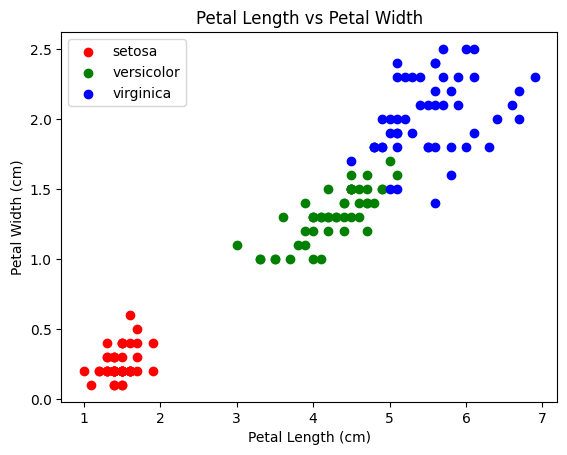

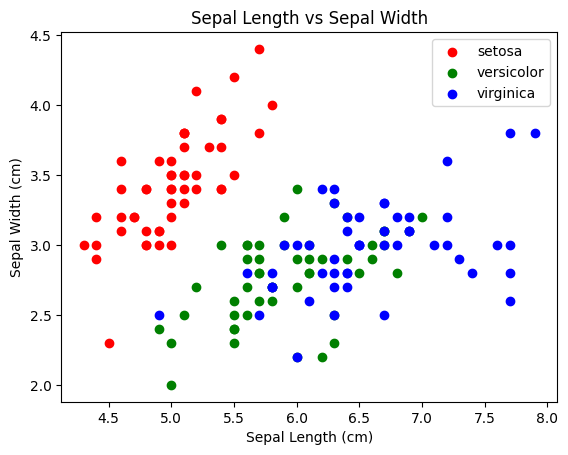

In [28]:
#Add code
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target_names[iris.target]
colors = {'setosa':'red', 'versicolor':'green', 'virginica':'blue'}

for species, group in df.groupby('species'):
    plt.scatter(
        group['petal length (cm)'],
        group['petal width (cm)'],
        label=species,
        color=colors[species]
    )

plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("Petal Length vs Petal Width")
plt.legend()
plt.show()

for species, group in df.groupby('species'):
    plt.scatter(
        group['sepal length (cm)'],
        group['sepal width (cm)'],
        label=species,
        color=colors[species]
    )

plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("Sepal Length vs Sepal Width")
plt.legend()
plt.show()

5. Visualize the histograms for the three different types of flowers. Adjust binning to change the level of detail on the histogram. Compare visually the Versicolor and Virginica histograms.

Full Target:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa   



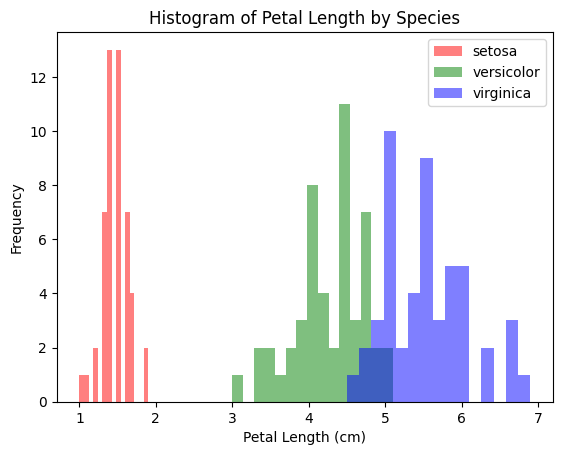

In [31]:
#Add code
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target_names[iris.target]
colors = {'setosa':'red', 'versicolor':'green', 'virginica':'blue'}

for species, group in df.groupby('species'):
    plt.hist(
        group['petal length (cm)'],
        bins=15,
        alpha=0.5,
        label=species,
        color=colors[species]
    )

plt.xlabel("Petal Length (cm)")
plt.ylabel("Frequency")
plt.title("Histogram of Petal Length by Species")
plt.legend()
plt.show()

6. Perform hypothesis testing to answer the following question: Is there a significant difference between the average Sepal Lengths for Virginica and Versicolor flowers? Formulate the Null and Alternative Hypothesis and use statsmodels library to perform the hypothesis test. Make sure to output the test statistic (z-score), p-value and formulate the conclusion of the hypothesis test.

Fill in

H0: mean of sepal length of Virginia == mean of sepal length of Versicolor

HA: mean of sepal length of Virginia != mean of sepal length of Versicolor

In [1]:
#Add code
from statsmodels.stats.weightstats import ztest
from scipy import stats
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = [iris.target_names[i] for i in iris.target]

virginica_lengths = df[df['species'] == 'virginica']['sepal length (cm)']
versicolor_lengths = df[df['species'] == 'versicolor']['sepal length (cm)']

z_stat, p_value = ztest(virginica_lengths, versicolor_lengths, alternative='two-sided')
alpha = 0.05
z_critical = stats.norm.ppf(1 - alpha/2)

print(f"Z-statistic: " ,z_stat)
print(f"Z-critical: " ,z_critical)
print(f"P-value: ", p_value)

print(f"\nSince |{z_stat}| > {z_critical}, we reject the null hypothesis.")
print(f"\nSince {p_value} is low, we reject the null hypothesis.")

Z-statistic:  5.629165259719801
Z-critical:  1.959963984540054
P-value:  1.8108383590599925e-08

Since |5.629165259719801| > 1.959963984540054, we reject the null hypothesis.

Since 1.8108383590599925e-08 is low, we reject the null hypothesis.
